In [1]:
import torch
from data.data import load_data, split_nodes, get_splitted_labels, create_graph
from model import Traditional_GCN, Jumping_GCN
from train import train_model
import networkx as nx
from testing import test_model, evaluate_model_performance

In [2]:
data_dir = data_dir = "cora/cora"
edgelist, node_data = load_data(data_dir)


graph = create_graph(edgelist)

splitted_nodes = split_nodes(node_data)


feature_data = node_data.drop(columns=['node_status', 'subject', 'node_id']).values

feature_data = torch.tensor(feature_data).float().to('cuda')

adjmatrix = nx.adjacency_matrix(graph, node_data.index).toarray()
adjmatrix = torch.from_numpy(adjmatrix).float().to('cuda')



INITIAL_FEATURES = feature_data.shape[1]
y_train, y_val, y_test = get_splitted_labels(splitted_nodes)


In [3]:
traditional_gcn = Traditional_GCN(INITIAL_FEATURES, node_data)
updated_gcn = Jumping_GCN(INITIAL_FEATURES, node_data)

Epoch 1/120
Train loss: 1.9530
Validation loss: 1.9347
Train accuracy: 0.1269
Validation accuracy: 0.1792


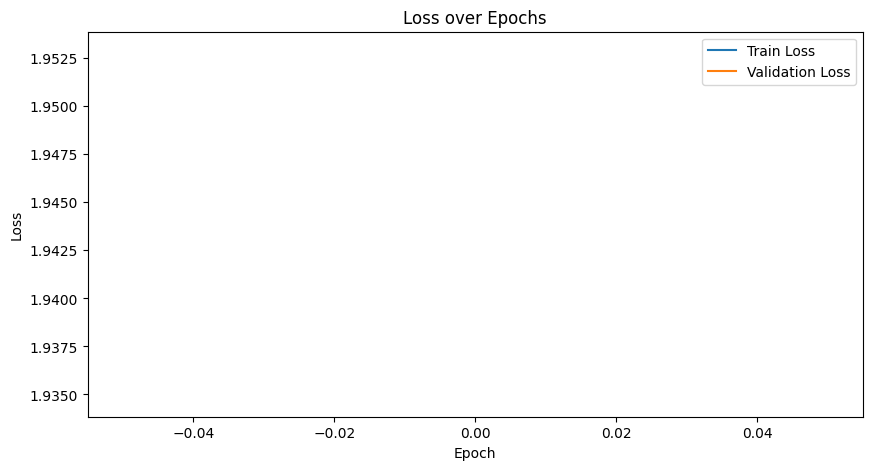

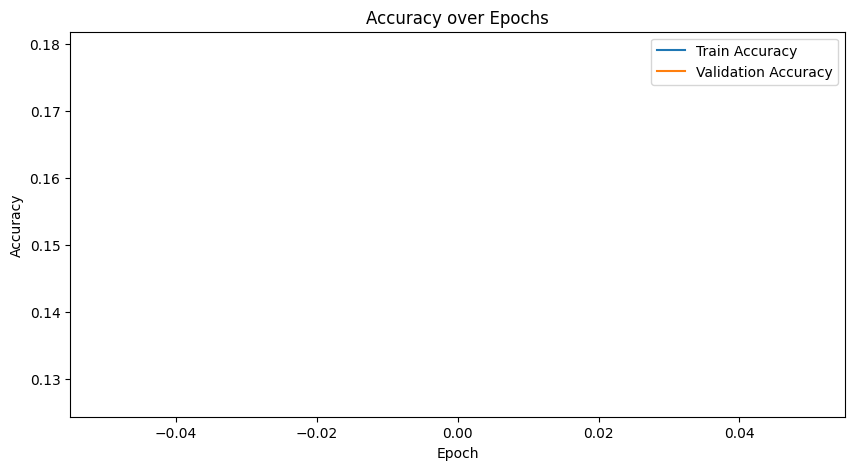

Epoch 11/120
Train loss: 1.7396
Validation loss: 1.7163
Train accuracy: 0.6011
Validation accuracy: 0.5896


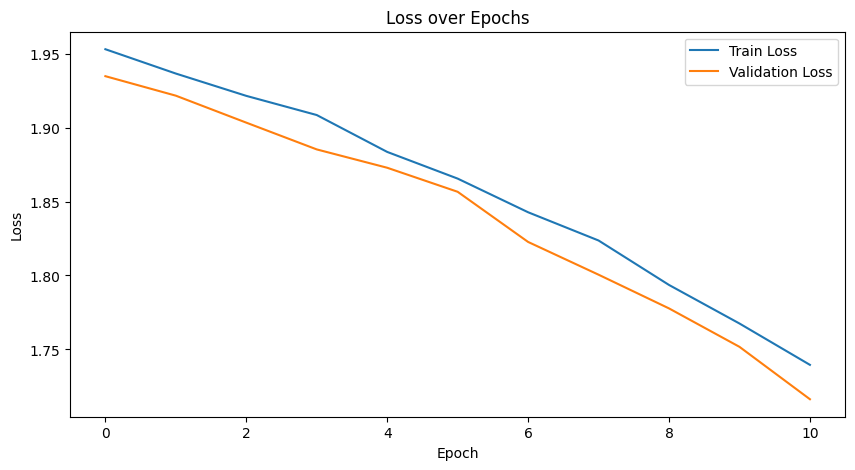

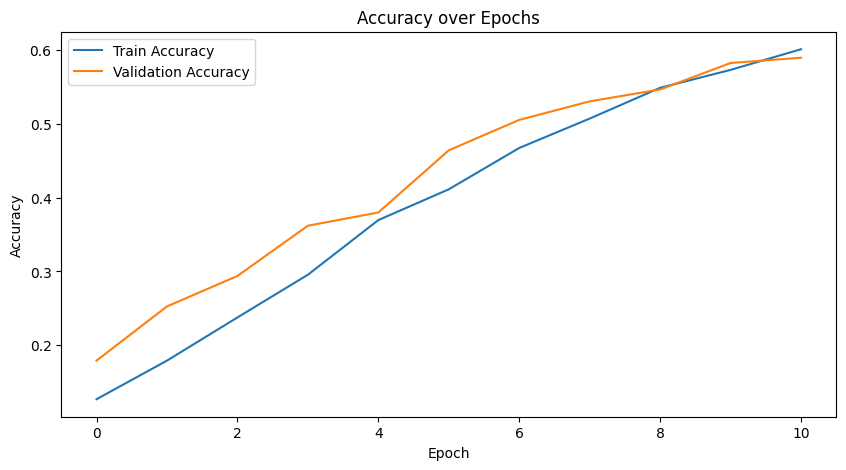

Epoch 21/120
Train loss: 1.5529
Validation loss: 1.5626
Train accuracy: 0.6758
Validation accuracy: 0.6631


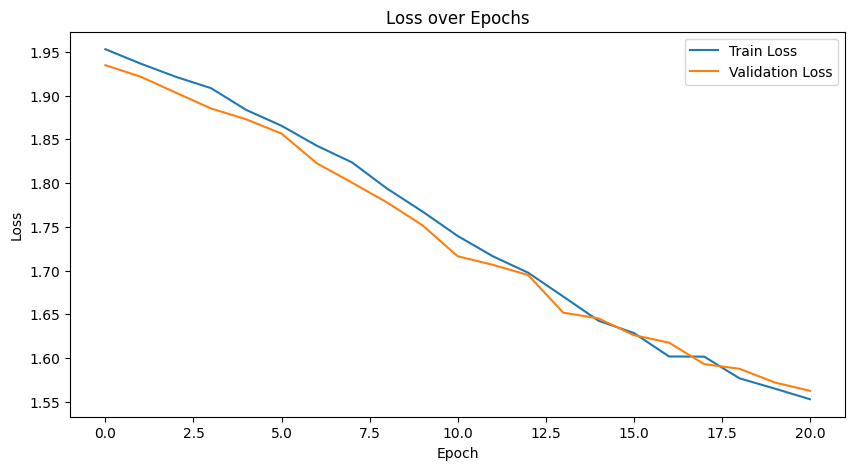

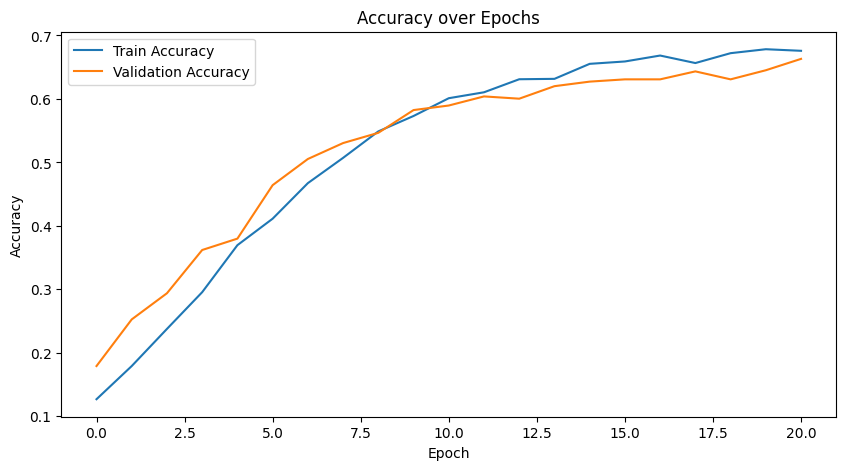

Epoch 31/120
Train loss: 1.4787
Validation loss: 1.5178
Train accuracy: 0.7038
Validation accuracy: 0.6577


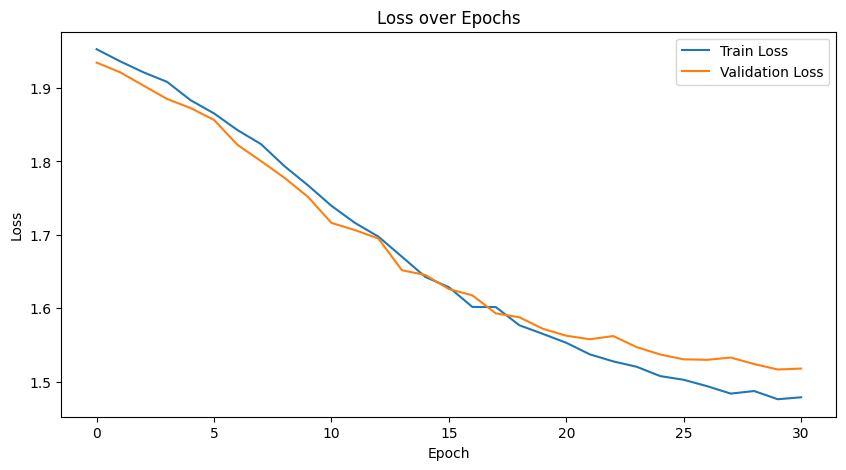

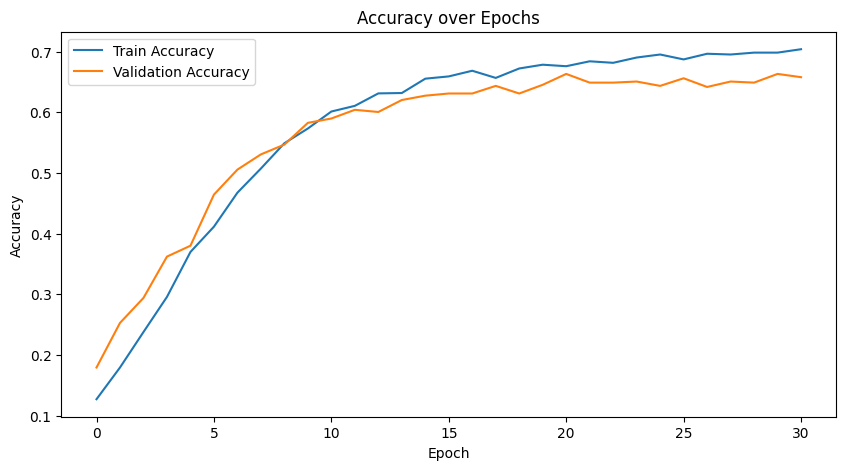

Epoch 41/120
Train loss: 1.4433
Validation loss: 1.4937
Train accuracy: 0.7106
Validation accuracy: 0.6559


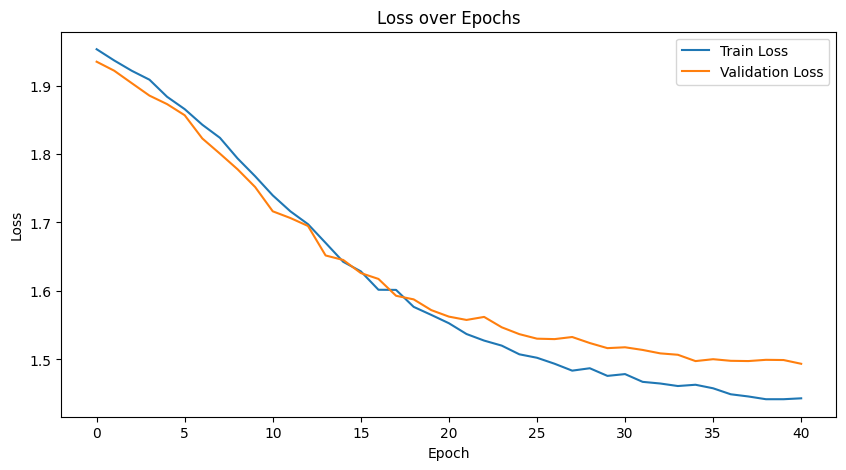

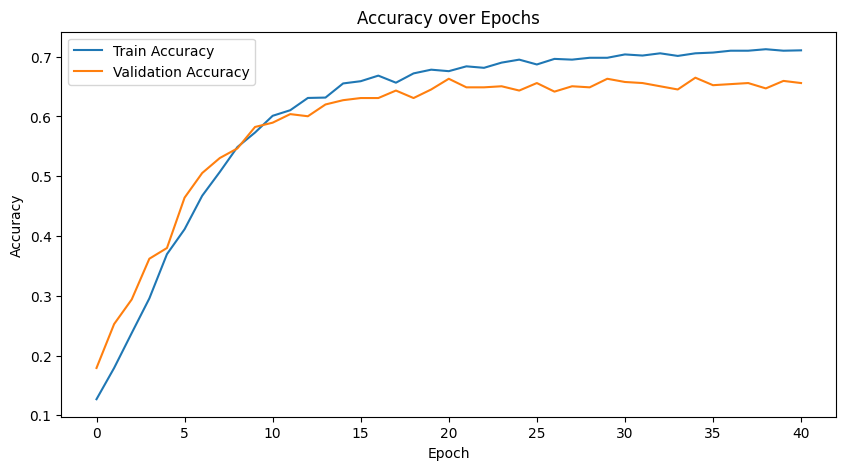

Epoch 51/120
Train loss: 1.4183
Validation loss: 1.4956
Train accuracy: 0.7349
Validation accuracy: 0.6792


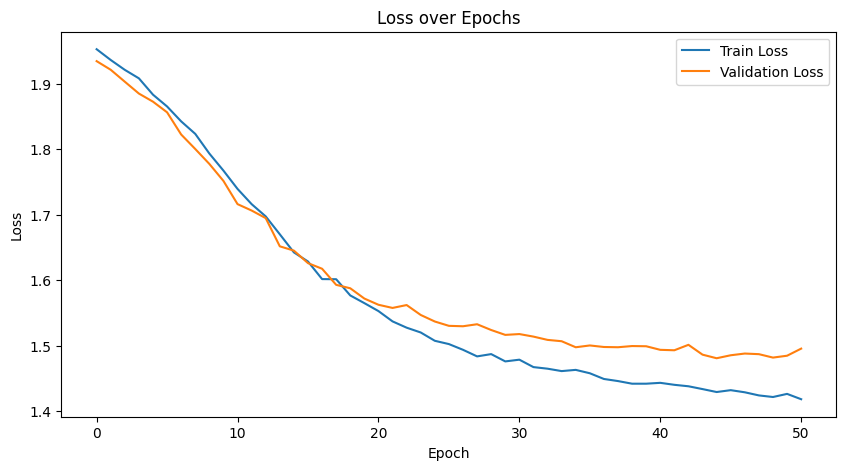

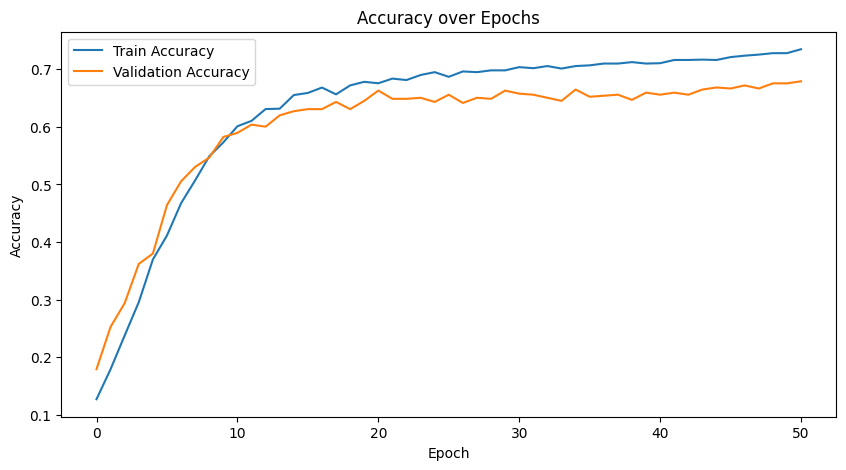

Epoch 61/120
Train loss: 1.4049
Validation loss: 1.4683
Train accuracy: 0.7841
Validation accuracy: 0.7294


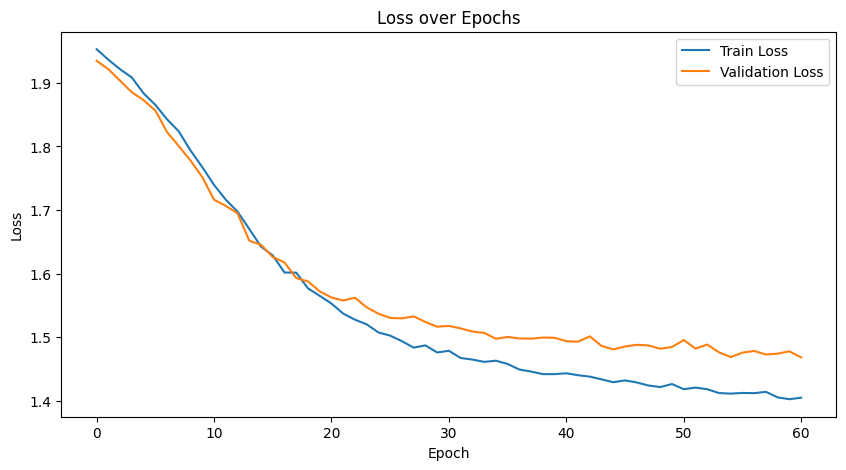

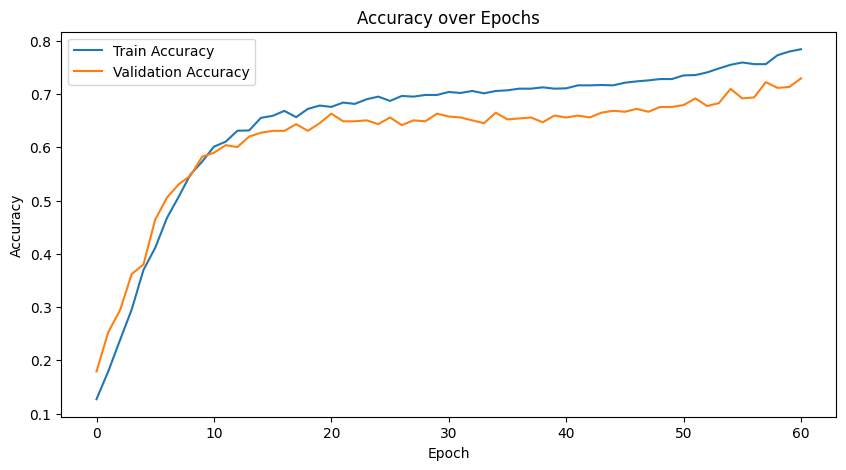

Epoch 71/120
Train loss: 1.3816
Validation loss: 1.4595
Train accuracy: 0.8058
Validation accuracy: 0.7258


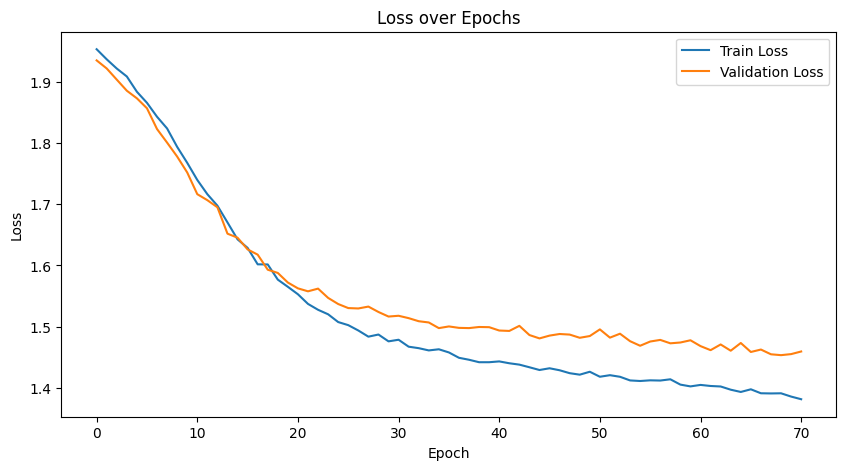

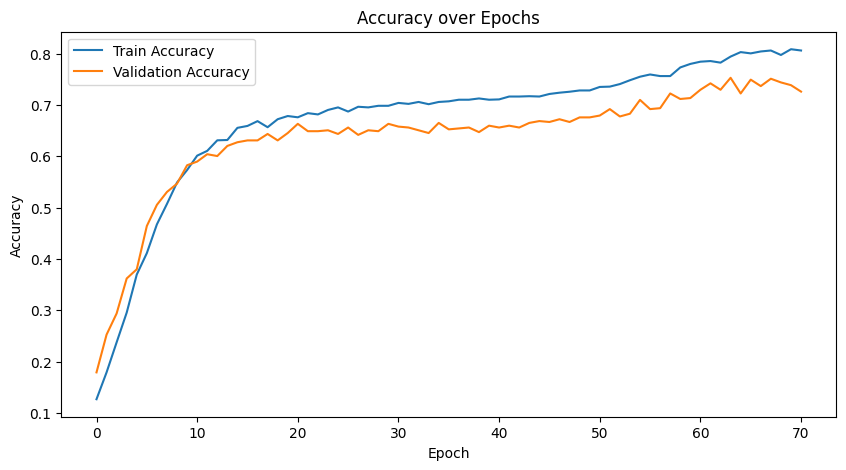

Epoch 81/120
Train loss: 1.3585
Validation loss: 1.4289
Train accuracy: 0.8295
Validation accuracy: 0.7509


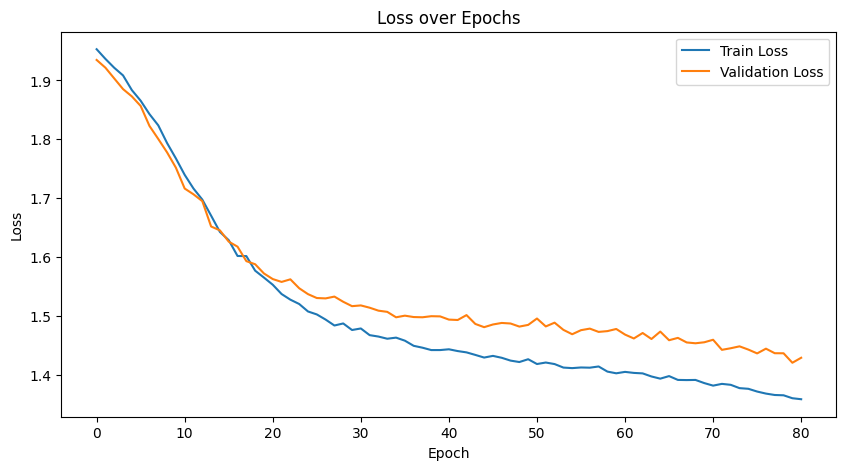

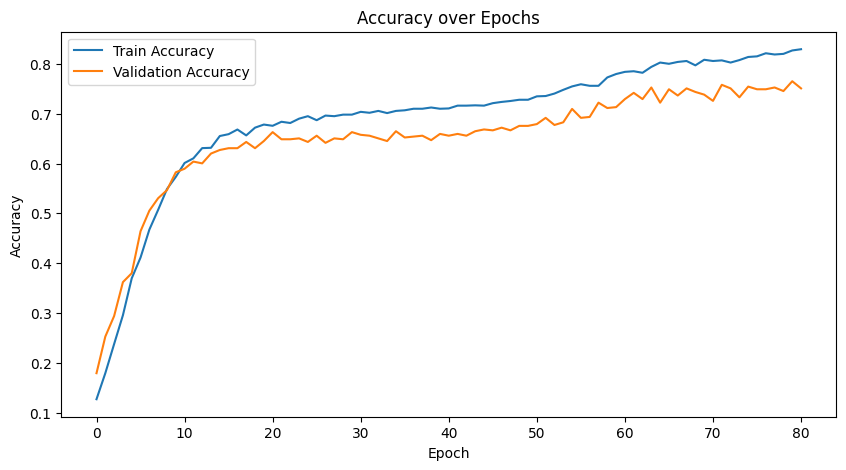

Epoch 91/120
Train loss: 1.3335
Validation loss: 1.4070
Train accuracy: 0.8494
Validation accuracy: 0.7742


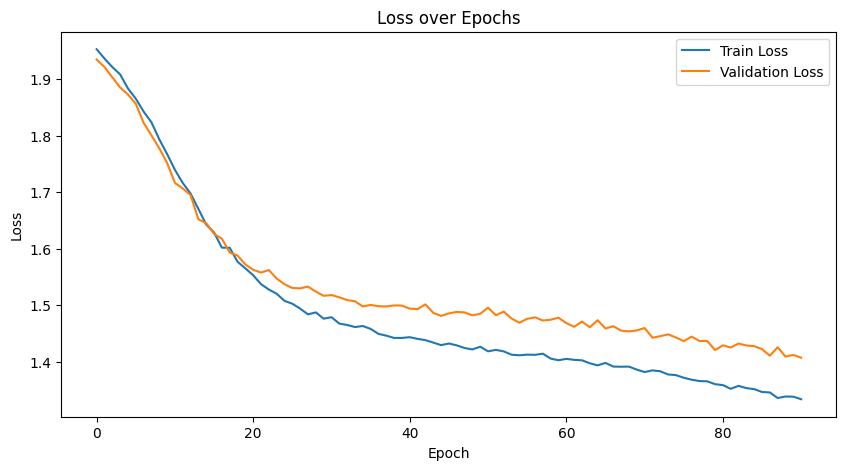

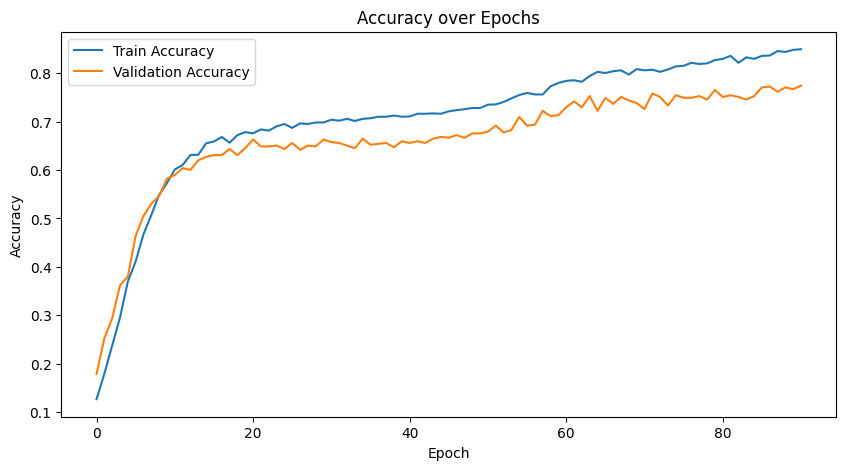

Epoch 101/120
Train loss: 1.3235
Validation loss: 1.4047
Train accuracy: 0.8587
Validation accuracy: 0.7706


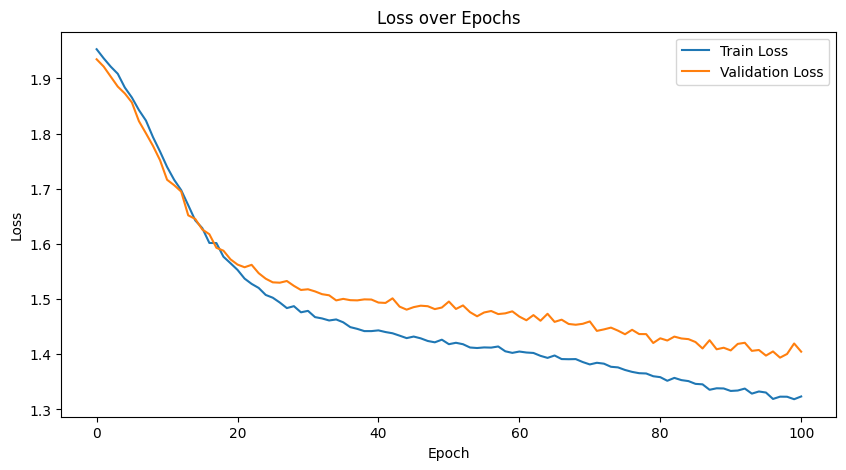

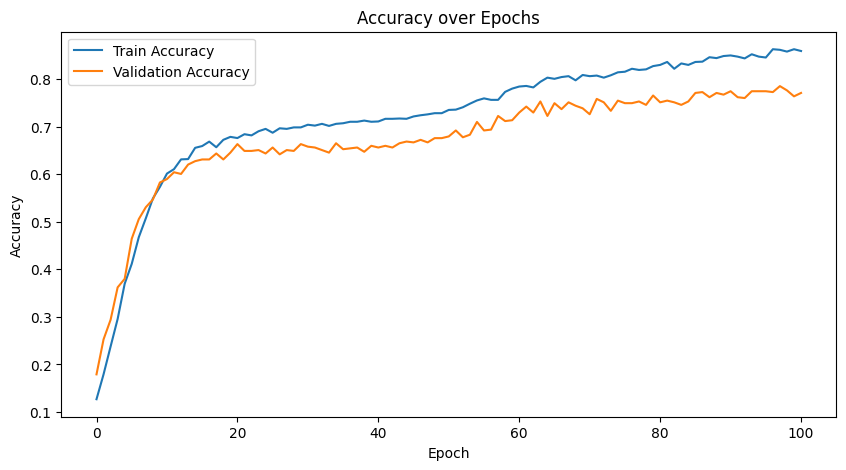

Epoch 111/120
Train loss: 1.2985
Validation loss: 1.4011
Train accuracy: 0.8830
Validation accuracy: 0.7957


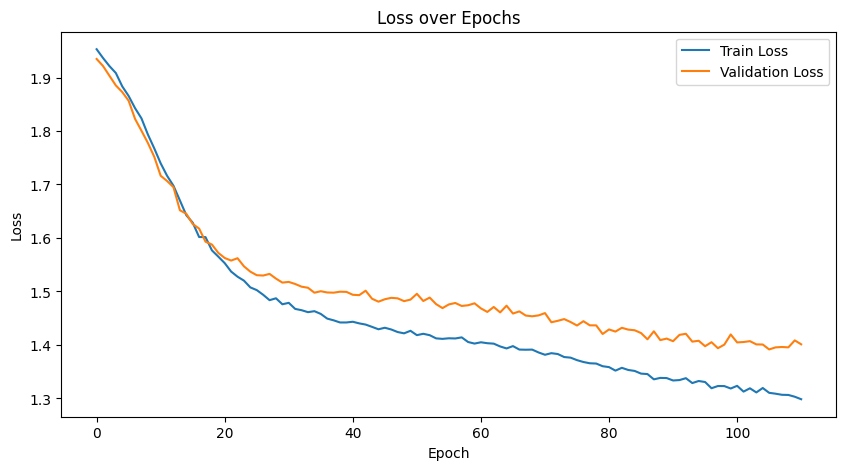

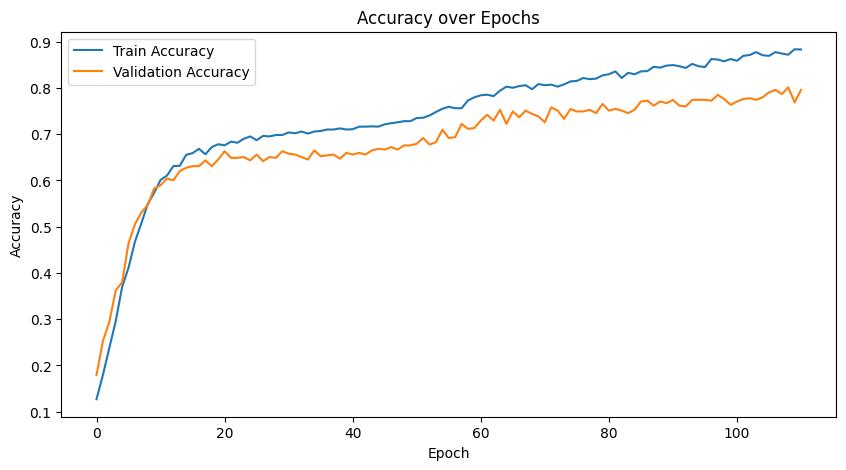

In [4]:
train_model(updated_gcn, adjmatrix, feature_data, y_train, y_val)

Epoch 1/120
Train loss: 3.4687
Validation loss: 3.4649
Train accuracy: 0.0174
Validation accuracy: 0.0448


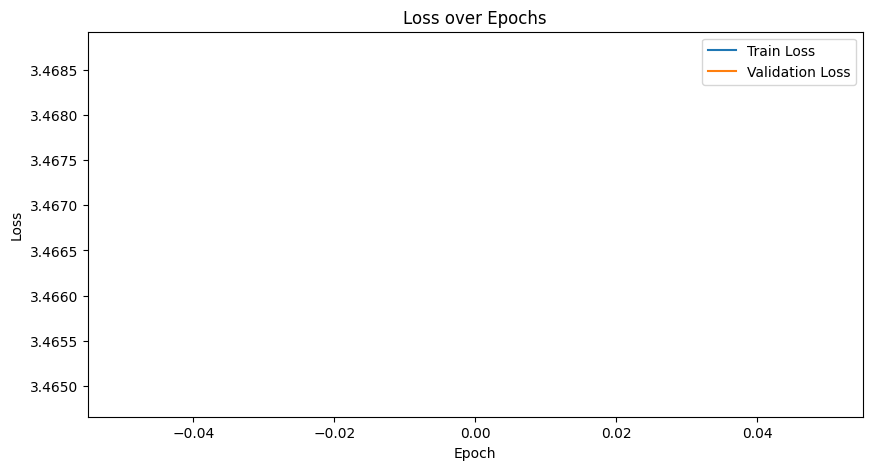

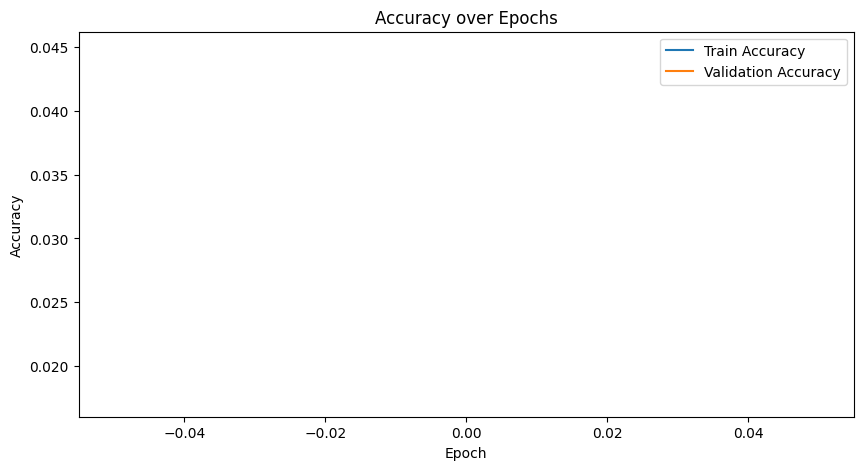

Epoch 11/120
Train loss: 3.3845
Validation loss: 3.3563
Train accuracy: 0.2887
Validation accuracy: 0.3423


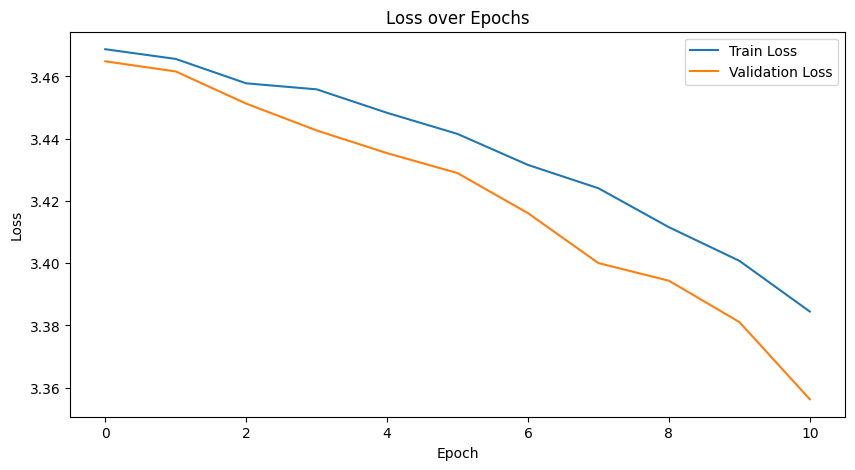

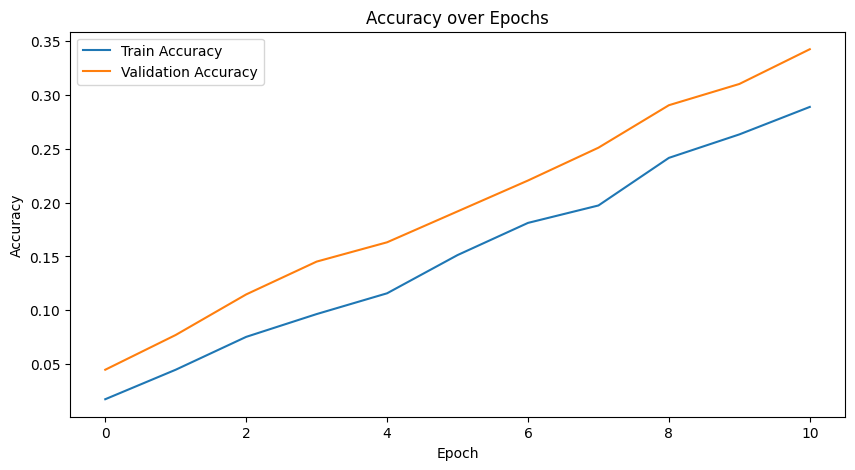

Epoch 21/120
Train loss: 3.2400
Validation loss: 3.2154
Train accuracy: 0.5128
Validation accuracy: 0.5305


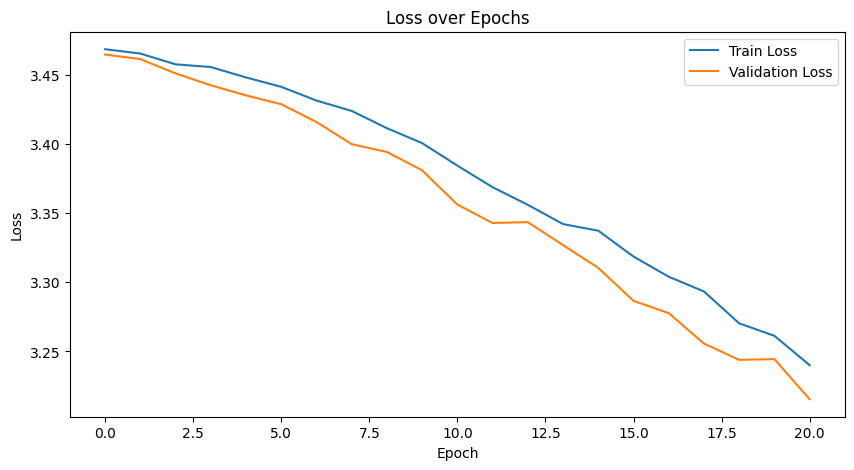

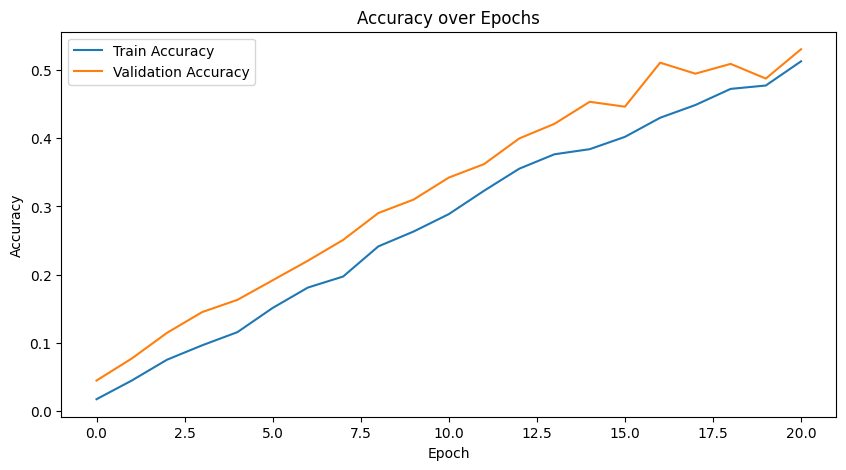

Epoch 31/120
Train loss: 3.0514
Validation loss: 3.0349
Train accuracy: 0.6714
Validation accuracy: 0.6667


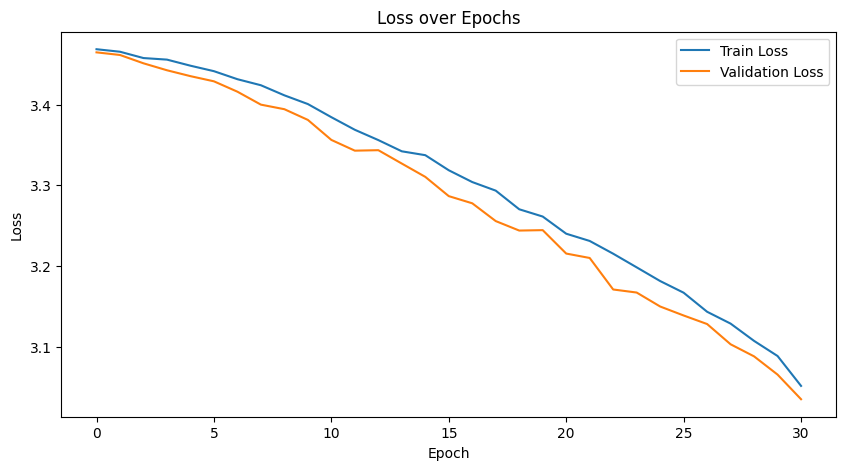

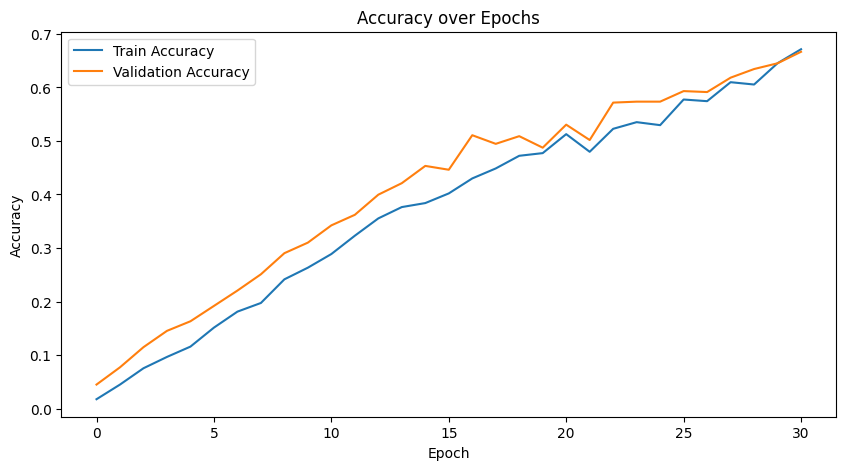

Epoch 41/120
Train loss: 2.8932
Validation loss: 2.8916
Train accuracy: 0.7355
Validation accuracy: 0.7168


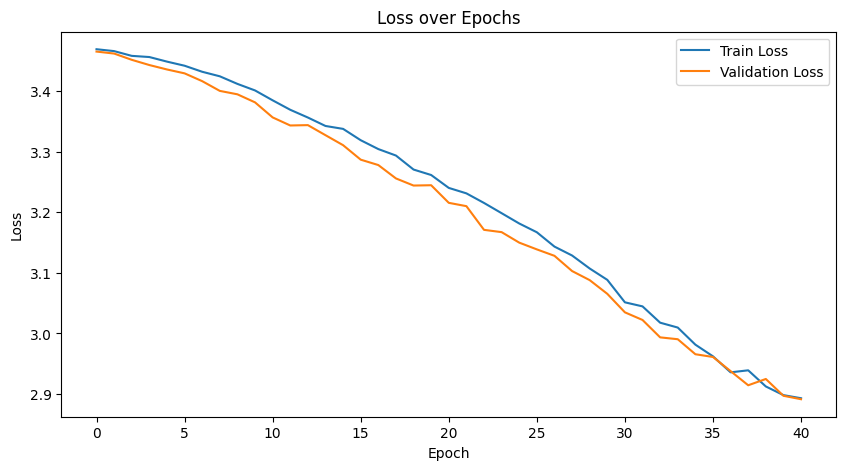

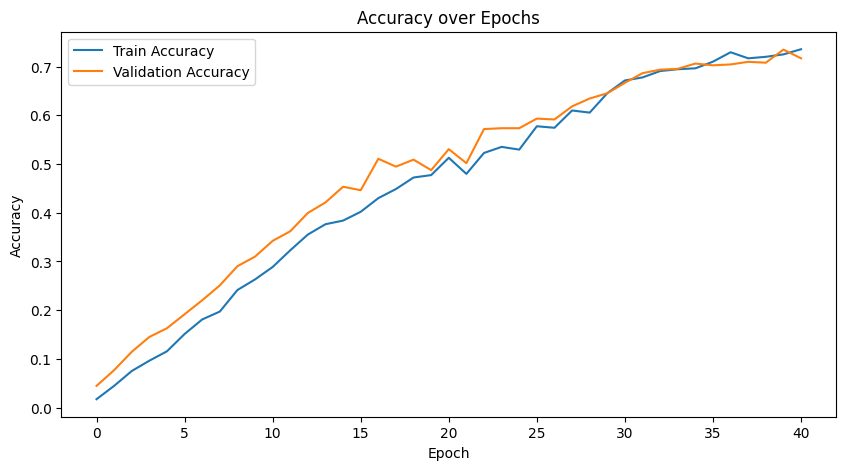

Epoch 51/120
Train loss: 2.8268
Validation loss: 2.8562
Train accuracy: 0.7517
Validation accuracy: 0.7079


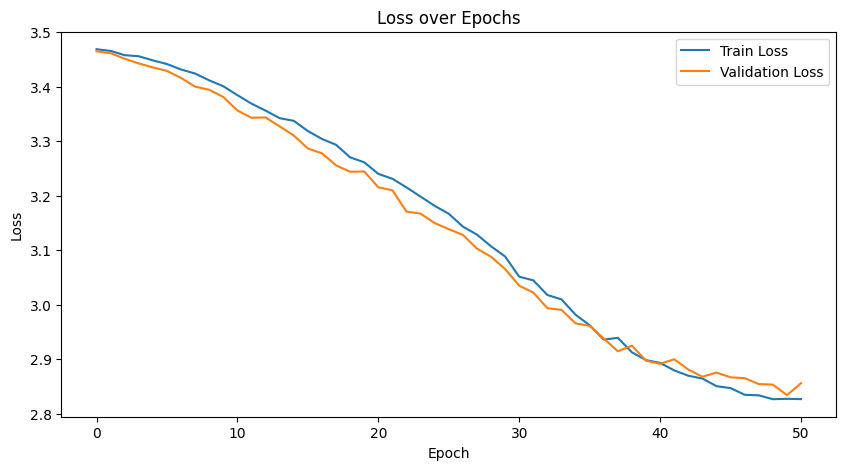

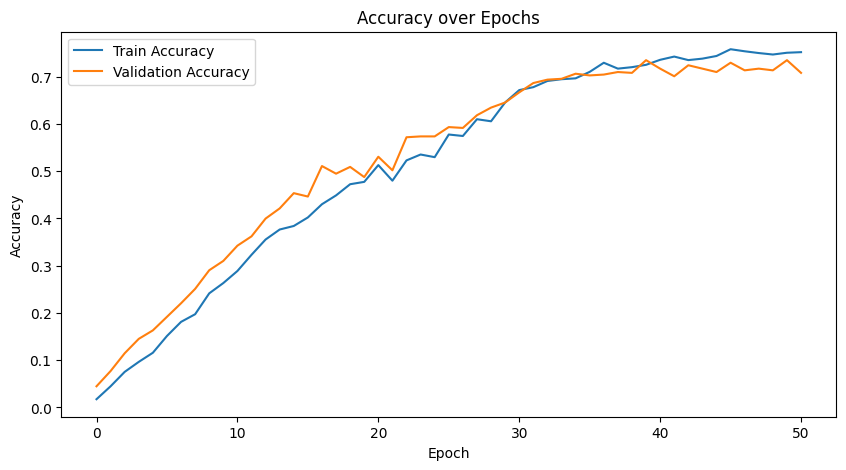

Epoch 61/120
Train loss: 2.7818
Validation loss: 2.8154
Train accuracy: 0.7810
Validation accuracy: 0.7384


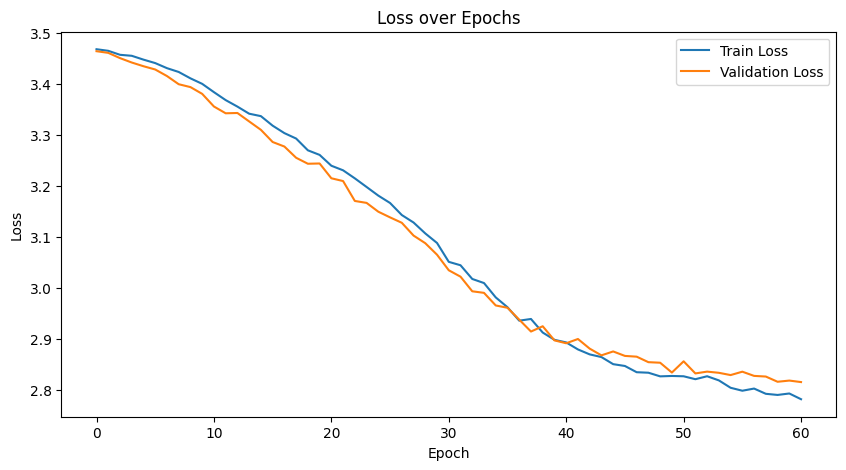

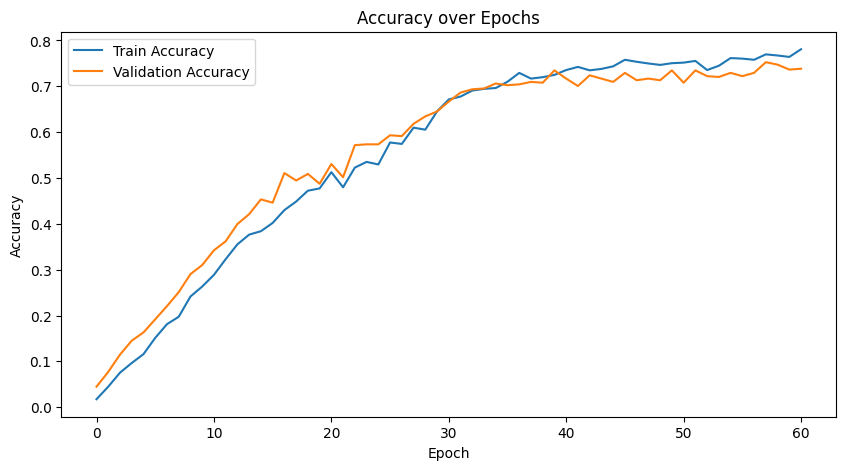

Epoch 71/120
Train loss: 2.7712
Validation loss: 2.8050
Train accuracy: 0.7722
Validation accuracy: 0.7348


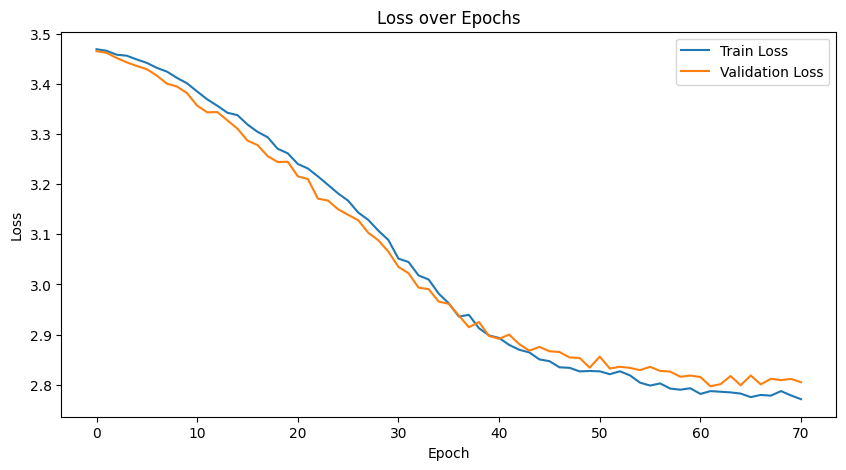

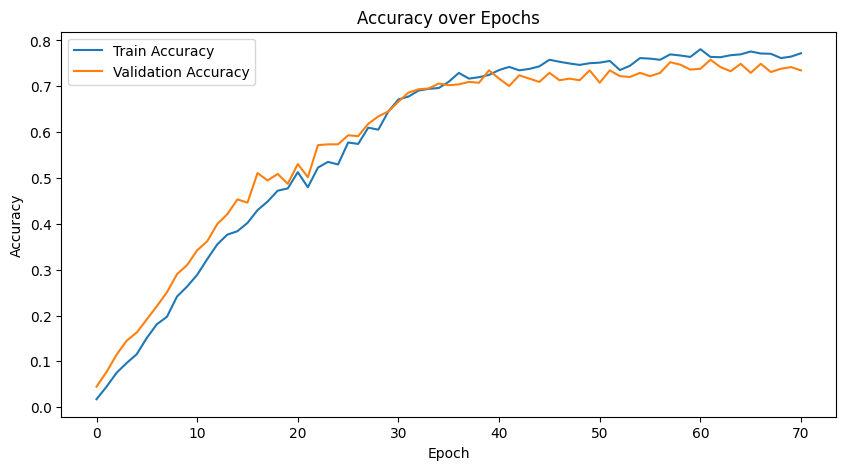

Epoch 81/120
Train loss: 2.7678
Validation loss: 2.8056
Train accuracy: 0.7747
Validation accuracy: 0.7455


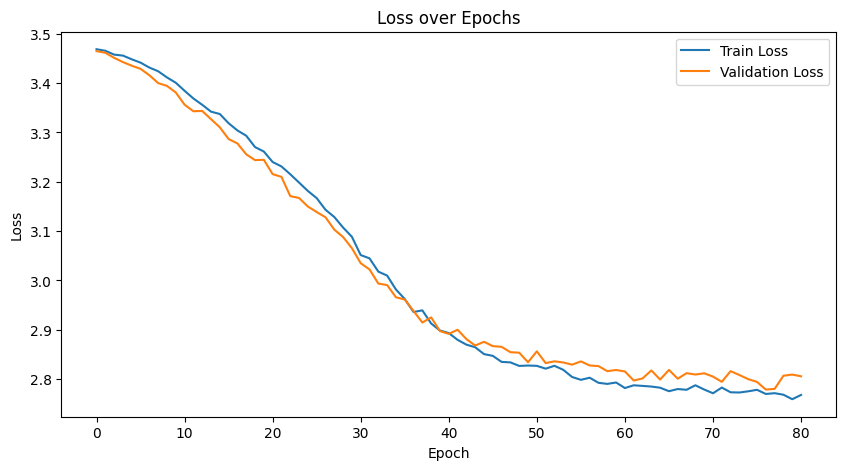

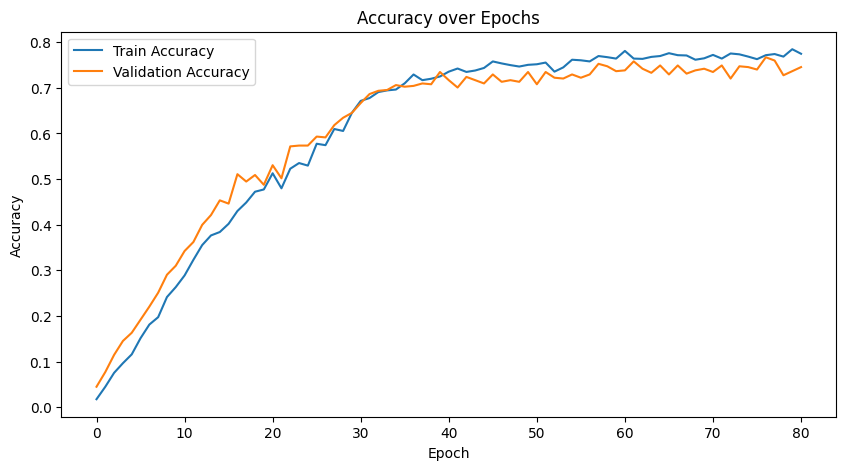

Epoch 91/120
Train loss: 2.7678
Validation loss: 2.7959
Train accuracy: 0.7716
Validation accuracy: 0.7366


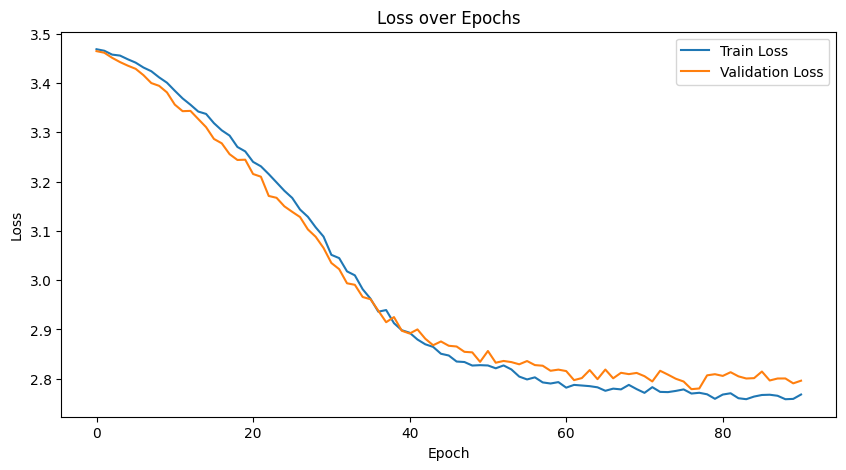

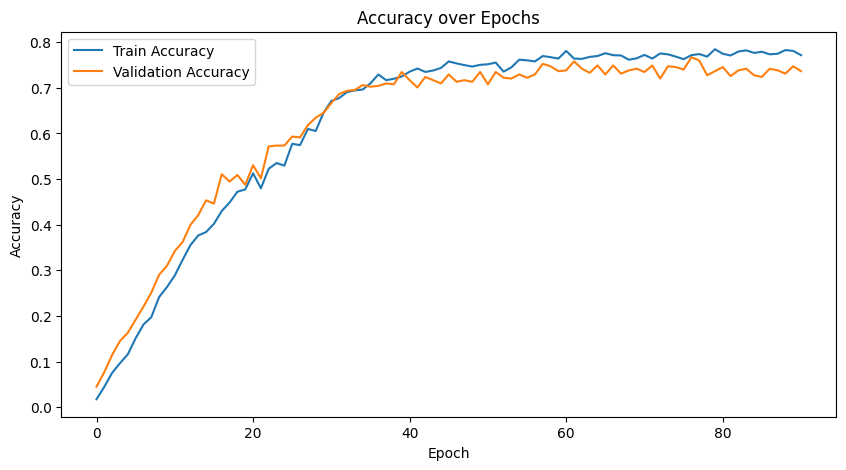

Epoch 101/120
Train loss: 2.7616
Validation loss: 2.8024
Train accuracy: 0.7766
Validation accuracy: 0.7330


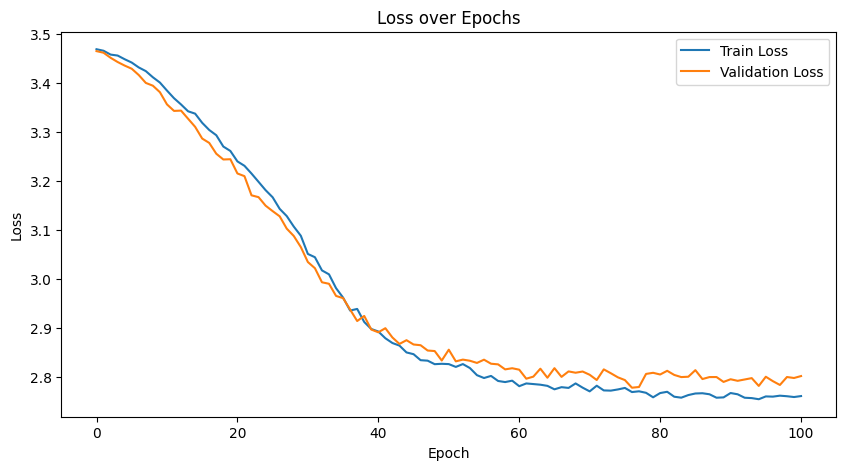

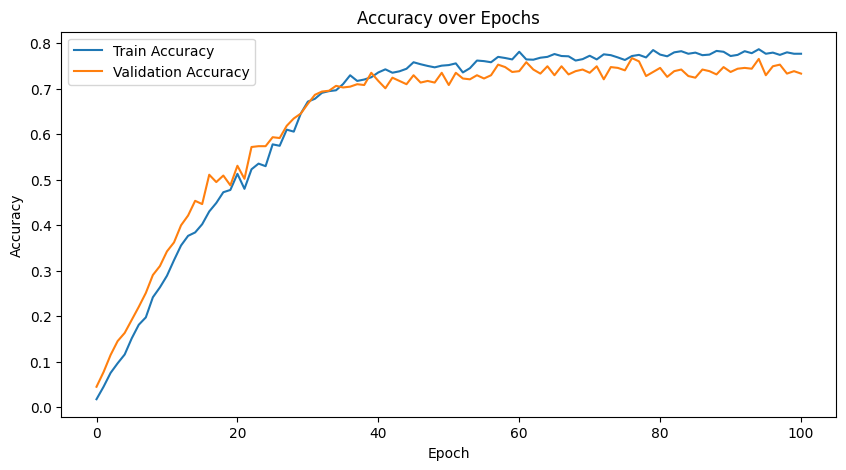

Epoch 111/120
Train loss: 2.7580
Validation loss: 2.7950
Train accuracy: 0.7747
Validation accuracy: 0.7473


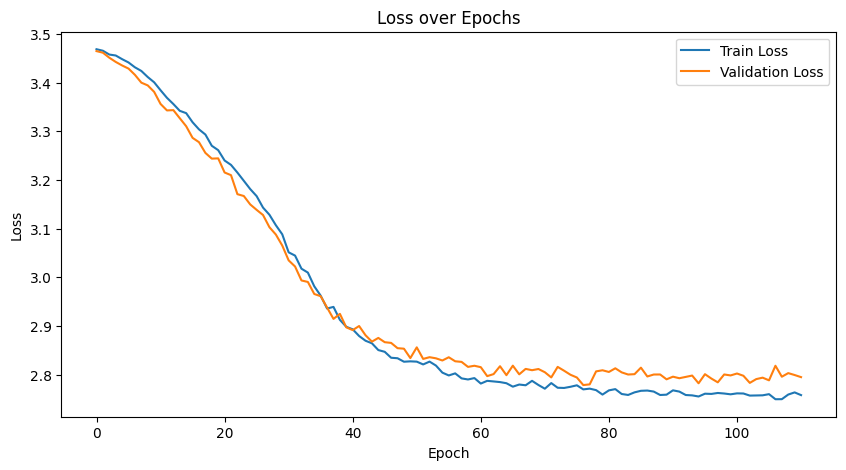

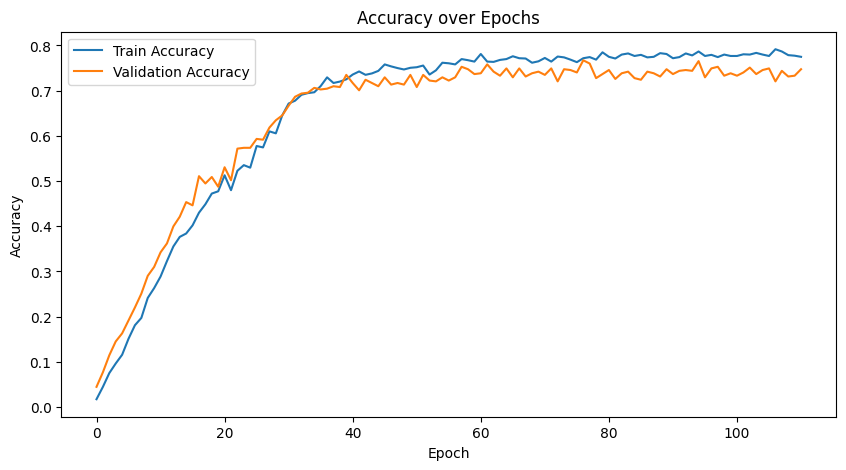

In [5]:
train_model(traditional_gcn, adjmatrix, feature_data, y_train, y_val)

In [6]:
updated_gcn.eval()
traditional_gcn.eval()

y_pred1 = updated_gcn(feature_data, adjmatrix, "test")
y_pred2 = traditional_gcn(feature_data, adjmatrix, "test")

In [7]:
test_model(y_pred1, y_test)

test loss is 1.3631373643875122
test acc is 0.8360957642725598


In [8]:
test_model(y_pred2, y_test)

test loss is 2.7721850872039795
test acc is 0.7476979742173112


Macro F1 Score: 0.8251


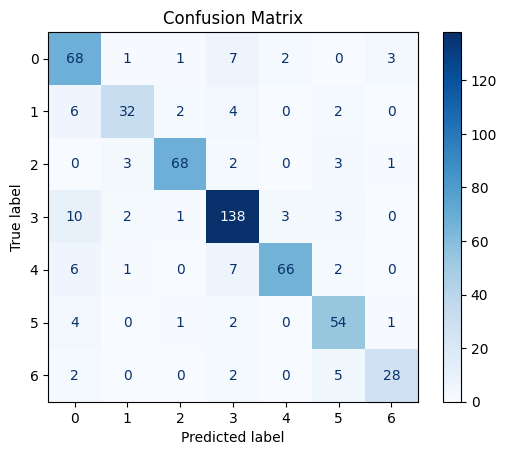

In [9]:
evaluate_model_performance(y_pred1, y_test)

Macro F1 Score: 0.5724


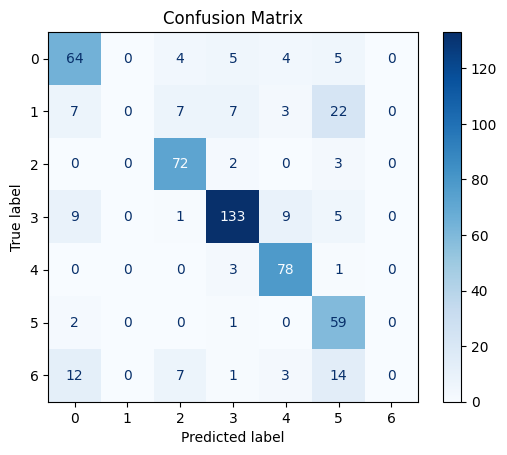

In [10]:
evaluate_model_performance(y_pred2, y_test)